<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

,season,batter,batsman_runs
36,2007/08,G Gambhir,465.0
109,2007/08,SE Marsh,412.0
120,2007/08,ST Jayasuriya,390.0
9,2007/08,AC Gilchrist,371.0
118,2007/08,SR Watson,355.0


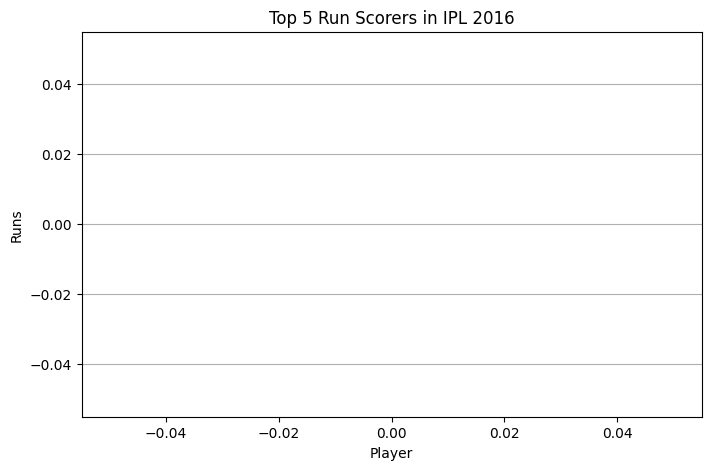

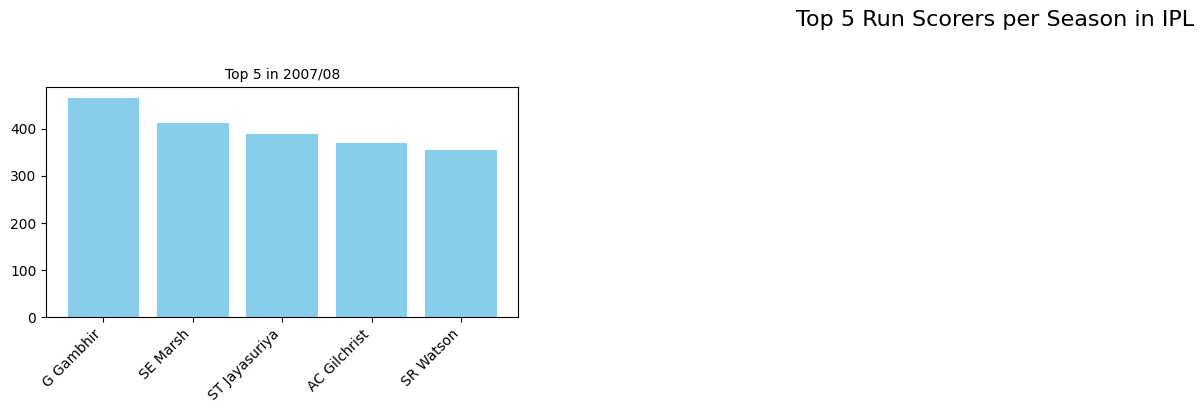

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Load Datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.info()
matches.describe()

matches['season'] = matches['season'].astype(str)


merged = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

season_runs = (
    merged.groupby(['season', 'batter'])['batsman_runs']
    .sum()
    .reset_index()
    .sort_values(['season', 'batsman_runs'], ascending=[True, False])
)
for season in sorted(season_runs['season'].unique()):
    print(f"\n Top 5 Run Scorers in {season}:")
    display(season_runs[season_runs['season'] == season].head(5))
# Filter for season 2016
selected_season = '2016'
top5_2016 = season_runs[season_runs['season'] == selected_season].head(5)

# Plot using matplotlib
plt.figure(figsize=(8,5))
plt.bar(top5_2016['batter'], top5_2016['batsman_runs'], color='coral')
plt.title(f"Top 5 Run Scorers in IPL {selected_season}")
plt.xlabel("Player")
plt.ylabel("Runs")
plt.grid(axis='y')
plt.show()
# Plot using Plotly
fig = px.bar(
    top5_2016,
    x='batter',
    y='batsman_runs',
    color='batsman_runs',
    title=f"Top 5 Run Scorers in IPL {selected_season} (Interactive)",
    labels={'batter': 'Player', 'batsman_runs': 'Runs'}
)
fig.show()

# Get unique seasons
unique_seasons = sorted(season_runs['season'].unique())

# Define number of rows and columns for subplots
num_seasons = len(unique_seasons)
cols = 4
rows = (num_seasons + cols - 1) // cols  # Ceiling division

# Set figure size based on grid size
plt.figure(figsize=(cols * 5, rows * 4))

# Create subplots for each season
for i, season in enumerate(unique_seasons):
    top5 = season_runs[season_runs['season'] == season].head(5)

    # Create subplot
    plt.subplot(rows, cols, i + 1)
    plt.bar(top5['batter'], top5['batsman_runs'], color='skyblue')
    plt.title(f"Top 5 in {season}", fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Show all plots
plt.suptitle("Top 5 Run Scorers per Season in IPL", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Plotly Express for interactive bar charts
for season in unique_seasons:
    top5 = season_runs[season_runs['season'] == season].head(5)
    fig = px.bar(
        top5,
        x='batter',
        y='batsman_runs',
        title=f'Top 5 Run Scorers in IPL {season}',
        labels={'batsman_runs': 'Runs'},
        color='batsman_runs'
    )
    fig.show()